In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
chartLab24 = pd.read_csv("../Code/output/chartLab24Item20.csv")

In [3]:
chartLab24.head()

,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE
0,36,165660,FIO,2134-05-12T12:00:00.000-04:00,100.00
1,36,165660,PH,2134-05-12T12:35:00.000-04:00,7.29
2,36,165660,HR,2134-05-12T13:00:00.000-04:00,86.00
3,36,165660,SBP,2134-05-12T13:00:00.000-04:00,137.00
4,36,165660,DBP,2134-05-12T13:00:00.000-04:00,72.00


In [4]:
chartLab24.info() # 12018539 events

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12018539 entries, 0 to 12018538
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   SUBJECT_ID  int64  
 1   HADM_ID     int64  
 2   ITEMID      object 
 3   CHARTTIME   object 
 4   VALUE       float64
dtypes: float64(1), int64(2), object(2)
memory usage: 458.5+ MB


In [5]:
patients = pd.read_csv("../Code/output/patientsInfo.csv")

In [6]:
patients.head()

,SUBJECT_ID,HADM_ID,Age,GENDER,HOSPITAL_EXPIRE_FLAG
0,22,165315,64.97,F,0
1,23,152223,71.18,M,0
2,23,124321,75.31,M,0
3,24,161859,39.04,M,0
4,25,129635,58.99,M,0


In [7]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46545 entries, 0 to 46544
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SUBJECT_ID            46545 non-null  int64  
 1   HADM_ID               46545 non-null  int64  
 2   Age                   46545 non-null  float64
 3   GENDER                46545 non-null  object 
 4   HOSPITAL_EXPIRE_FLAG  46545 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.8+ MB


In [8]:
patients[['GENDER_01']] = patients.apply(lambda x: 0 if x.GENDER=='F' else 1, axis=1)

In [9]:
patients.head()

,SUBJECT_ID,HADM_ID,Age,GENDER,HOSPITAL_EXPIRE_FLAG,GENDER_01
0,22,165315,64.97,F,0,0
1,23,152223,71.18,M,0,1
2,23,124321,75.31,M,0,1
3,24,161859,39.04,M,0,1
4,25,129635,58.99,M,0,1


# Clean data--outliers

In [10]:
# chart24 initially 11,377,877 entries

In [11]:
# GLU
chartLab24 = chartLab24.drop(chartLab24[(chartLab24.ITEMID=='GLU') & (chartLab24.VALUE>5000)].index) ##  entries

In [12]:
# DBP
chartLab24 = chartLab24.drop(chartLab24[(chartLab24.ITEMID=='DBP') & (chartLab24.VALUE>1000)].index) ##  entries

In [13]:
# FIO -- ignore
# chart24 = chart24.drop(chart24[(chart24.ITEMID=='FIO') & (chart24.VALUE>100)].index) ##  entries

In [14]:
# HEIGHT
chartLab24 = chartLab24.drop(chartLab24[(chartLab24.ITEMID=='HEIGHT') & (chartLab24.VALUE>300)].index) ##  entries

In [15]:
# HR
chartLab24 = chartLab24.drop(chartLab24[(chartLab24.ITEMID=='HR') & (chartLab24.VALUE>10000)].index) ##  entries

In [16]:
# MBP
chartLab24 = chartLab24.drop(chartLab24[(chartLab24.ITEMID=='MBP') & (chartLab24.VALUE>1000)].index) ##  entries

In [17]:
# OS
chartLab24 = chartLab24.drop(chartLab24[(chartLab24.ITEMID=='OS') & (chartLab24.VALUE>10000)].index) ##  entries

In [18]:
# PH
chartLab24 = chartLab24.drop(chartLab24[(chartLab24.ITEMID=='PH') & (chartLab24.VALUE>10)].index) ##   entries

In [19]:
# RESPR
chartLab24 = chartLab24.drop(chartLab24[(chartLab24.ITEMID=='RESPR') & (chartLab24.VALUE>1000)].index) ##   entries

In [20]:
# SBP
chartLab24 = chartLab24.drop(chartLab24[(chartLab24.ITEMID=='SBP') & (chartLab24.VALUE>1000)].index) ##   entries

In [21]:
# TEMP
chartLab24 = chartLab24.drop(chartLab24[(chartLab24.ITEMID=='TEMP') & (chartLab24.VALUE>50)].index) 
chartLab24 = chartLab24.drop(chartLab24[(chartLab24.ITEMID=='TEMP') & (chartLab24.VALUE<20)].index) ##   entries

In [22]:
# weight
chartLab24 = chartLab24.drop(chartLab24[(chartLab24.ITEMID=='WEIGHT') & (chartLab24.VALUE>1000)].index) 
chartLab24 = chartLab24.drop(chartLab24[(chartLab24.ITEMID=='WEIGHT') & (chartLab24.VALUE<10)].index) ##   entries

In [23]:
chartLab24.info() # 12,017,199

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12017191 entries, 0 to 12018538
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   SUBJECT_ID  int64  
 1   HADM_ID     int64  
 2   ITEMID      object 
 3   CHARTTIME   object 
 4   VALUE       float64
dtypes: float64(1), int64(2), object(2)
memory usage: 550.1+ MB


In [24]:
chartLab24_mean = chartLab24[['HADM_ID', 'ITEMID', 'VALUE']].groupby(['HADM_ID', 'ITEMID'], as_index=False).mean()

In [25]:
len(chartLab24_mean['HADM_ID'].unique()) ## 46228 admission, 14 itemid

46228

In [26]:
chartLab24_mean.head()

,HADM_ID,ITEMID,VALUE
0,100001,DBP,90.666667
1,100001,GLU,176.576923
2,100001,GMR,6.000000
3,100001,GO,4.000000
4,100001,GVR,5.000000


In [27]:
# pivot table to have each itemid as one column
chartLab24_pivot = chartLab24_mean.pivot(index='HADM_ID', columns = 'ITEMID', values='VALUE')

In [28]:
chartLab24_pivot.head()

ITEMID,CRR,DBP,FIO,GLU,GMR,GO,GT,GVR,HEIGHT,HR,MBP,OS,PH,POTA,RESPR,SBP,TEMP,UREA,WBC,WEIGHT
HADM_ID,,,,,,,,,,,,,,,,,,,,
100001,NaN,90.666667,NaN,176.576923,6.0,4.000000,NaN,5.0,NaN,111.760000,110.545455,97.833333,6.500000,4.075,16.875000,177.041667,37.047619,37.75,10.800000,98.010000
100003,NaN,57.593750,NaN,81.200000,6.0,3.857143,NaN,5.0,NaN,79.441176,70.031250,98.088235,6.746667,5.000,15.058824,109.468750,36.246032,47.50,13.933333,84.882500
100006,NaN,68.782609,NaN,155.000000,6.0,4.000000,15.0,5.0,NaN,111.958333,88.405796,97.880000,7.370000,3.700,19.375000,127.652174,36.231482,16.00,13.600000,57.000000
100007,NaN,62.558824,NaN,126.800000,6.0,3.900000,14.1,4.2,NaN,76.242424,87.878788,99.823529,NaN,4.400,16.205882,141.558824,36.825392,13.00,10.550000,55.099998
100009,NaN,53.125000,70.0,139.968750,4.0,4.000000,NaN,3.4,182.94,78.478261,69.958333,96.606061,7.372174,4.050,22.689655,114.833333,NaN,12.50,14.466667,116.650000


In [29]:
chartLab24_pivot.describe()

ITEMID,CRR,DBP,FIO,GLU,GMR,GO,GT,GVR,HEIGHT,HR,MBP,OS,PH,POTA,RESPR,SBP,TEMP,UREA,WBC,WEIGHT
count,603.000000,45551.000000,11049.000000,45558.000000,45574.000000,44769.000000,25097.000000,45517.000000,7958.000000,45552.000000,45545.000000,45748.000000,31189.000000,45140.000000,45510.000000,45551.000000,44819.000000,44880.000000,44331.000000,34899.000000
mean,0.176731,60.753918,52.794358,139.769909,5.359049,3.469790,12.144194,3.594040,168.626629,85.141822,78.146019,96.848085,7.101006,4.142703,18.084805,118.946055,36.813807,24.951671,11.814366,81.651078
std,0.346208,11.034646,25.518506,46.616994,1.120022,0.751136,3.357234,1.609497,15.098265,15.627219,11.421022,4.214614,0.643116,0.572347,4.090390,17.280853,0.632944,20.519487,9.187077,24.445153
min,0.000000,0.000000,0.000000,21.000000,1.000000,1.000000,3.000000,1.000000,0.000000,26.357143,17.428571,13.500000,0.000000,1.942857,2.000000,0.000000,30.000000,1.000000,0.000000,10.000000
25%,0.000000,53.290995,43.333333,111.000000,5.142857,3.200000,9.916667,2.000000,162.780000,74.172167,70.347826,95.833333,7.166000,3.800000,15.261128,106.727273,36.435185,12.500000,7.700000,65.670000
50%,0.000000,59.739130,52.000000,129.500000,6.000000,3.833333,13.714286,4.333333,170.090000,84.068381,76.793096,97.250000,7.347500,4.100000,17.500000,116.620000,36.788889,18.000000,10.600000,78.400002
75%,0.072917,67.113961,63.333333,156.000000,6.000000,4.000000,15.000000,5.000000,177.900000,95.095622,84.809524,98.466667,7.399412,4.422222,20.285714,129.434783,37.182548,29.750000,14.166667,93.202500
max,1.388889,132.333333,1001.000000,800.235294,6.000000,4.000000,15.000000,5.000000,248.960000,215.575758,148.968750,497.608696,9.000000,36.970588,49.555556,215.833333,40.833317,263.250000,619.725000,670.000000


# Null entry imputation

In [30]:
# null entry imputation-- CRR 0.0
chartLab24_pivot['CRR'].fillna(0.0, inplace=True)

In [31]:
# null entry imputation-- DBP 59.0
chartLab24_pivot['DBP'].fillna(59.0, inplace=True)

In [32]:
# null entry imputation-- FIO 0.21
chartLab24_pivot['FIO'].fillna(52, inplace=True)

In [33]:
# null entry imputation-- GLU 128
chartLab24_pivot['GLU'].fillna(128, inplace=True)

In [34]:
# null entry imputation-- GMR 6
chartLab24_pivot['GMR'].fillna(6, inplace=True)

In [35]:
# null entry imputation-- GO 4
chartLab24_pivot['GO'].fillna(4, inplace=True)

In [36]:
# null entry imputation-- GT 15
chartLab24_pivot['GT'].fillna(15, inplace=True)

In [37]:
# null entry imputation-- GVR 5
chartLab24_pivot['GVR'].fillna(5, inplace=True)

In [38]:
# null entry imputation-- HEIGHT 5
chartLab24_pivot['HEIGHT'].fillna(170, inplace=True)

In [39]:
# null entry imputation-- MBP 77
chartLab24_pivot['MBP'].fillna(77, inplace=True)

In [40]:
# null entry imputation-- HR 5
chartLab24_pivot['HR'].fillna(86, inplace=True)

In [41]:
# null entry imputation-- OS 98
chartLab24_pivot['OS'].fillna(98, inplace=True)

In [42]:
# null entry imputation-- PH 98
chartLab24_pivot['PH'].fillna(7.4, inplace=True)

In [43]:
# null entry imputation-- RESPR 98
chartLab24_pivot['RESPR'].fillna(19, inplace=True)

In [44]:
# null entry imputation-- SBP 118
chartLab24_pivot['SBP'].fillna(118, inplace=True)

In [45]:
# null entry imputation-- TEMP 36.6
chartLab24_pivot['TEMP'].fillna(36.6, inplace=True)

In [46]:
# null entry imputation-- WEIGHT 81
chartLab24_pivot['WEIGHT'].fillna(81, inplace=True)

In [47]:
# null entry imputation-- POTA 4.14
chartLab24_pivot['POTA'].fillna(4.14, inplace=True)

In [48]:
# null entry imputation-- UREA 25
chartLab24_pivot['UREA'].fillna(25, inplace=True)

In [49]:
# null entry imputation-- WBC 11.81
chartLab24_pivot['WBC'].fillna(11.81, inplace=True)

In [50]:
chartLab24_pivot.head()

ITEMID,CRR,DBP,FIO,GLU,GMR,GO,GT,GVR,HEIGHT,HR,MBP,OS,PH,POTA,RESPR,SBP,TEMP,UREA,WBC,WEIGHT
HADM_ID,,,,,,,,,,,,,,,,,,,,
100001,0.0,90.666667,52.0,176.576923,6.0,4.000000,15.0,5.0,170.00,111.760000,110.545455,97.833333,6.500000,4.075,16.875000,177.041667,37.047619,37.75,10.800000,98.010000
100003,0.0,57.593750,52.0,81.200000,6.0,3.857143,15.0,5.0,170.00,79.441176,70.031250,98.088235,6.746667,5.000,15.058824,109.468750,36.246032,47.50,13.933333,84.882500
100006,0.0,68.782609,52.0,155.000000,6.0,4.000000,15.0,5.0,170.00,111.958333,88.405796,97.880000,7.370000,3.700,19.375000,127.652174,36.231482,16.00,13.600000,57.000000
100007,0.0,62.558824,52.0,126.800000,6.0,3.900000,14.1,4.2,170.00,76.242424,87.878788,99.823529,7.400000,4.400,16.205882,141.558824,36.825392,13.00,10.550000,55.099998
100009,0.0,53.125000,70.0,139.968750,4.0,4.000000,15.0,3.4,182.94,78.478261,69.958333,96.606061,7.372174,4.050,22.689655,114.833333,36.600000,12.50,14.466667,116.650000


In [51]:
chartLab24_pivot.isna().any()

ITEMID
CRR       False
DBP       False
FIO       False
GLU       False
GMR       False
GO        False
GT        False
GVR       False
HEIGHT    False
HR        False
MBP       False
OS        False
PH        False
POTA      False
RESPR     False
SBP       False
TEMP      False
UREA      False
WBC       False
WEIGHT    False
dtype: bool

# Combine label and data together

In [52]:
patients.head()

,SUBJECT_ID,HADM_ID,Age,GENDER,HOSPITAL_EXPIRE_FLAG,GENDER_01
0,22,165315,64.97,F,0,0
1,23,152223,71.18,M,0,1
2,23,124321,75.31,M,0,1
3,24,161859,39.04,M,0,1
4,25,129635,58.99,M,0,1


In [53]:
chartLab24_withlabel = chartLab24_pivot.join(patients[['HADM_ID', 'Age','GENDER_01','HOSPITAL_EXPIRE_FLAG']].set_index('HADM_ID'), how='left')

In [54]:
chartLab24_withlabel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46228 entries, 100001 to 199999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CRR                   46228 non-null  float64
 1   DBP                   46228 non-null  float64
 2   FIO                   46228 non-null  float64
 3   GLU                   46228 non-null  float64
 4   GMR                   46228 non-null  float64
 5   GO                    46228 non-null  float64
 6   GT                    46228 non-null  float64
 7   GVR                   46228 non-null  float64
 8   HEIGHT                46228 non-null  float64
 9   HR                    46228 non-null  float64
 10  MBP                   46228 non-null  float64
 11  OS                    46228 non-null  float64
 12  PH                    46228 non-null  float64
 13  POTA                  46228 non-null  float64
 14  RESPR                 46228 non-null  float64
 15  SBP          

# Logistic model

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix

In [56]:
X = chartLab24_withlabel.loc[:, 'CRR':'GENDER_01']
Y = chartLab24_withlabel.loc[:,'HOSPITAL_EXPIRE_FLAG']

In [57]:
X.shape

(46228, 22)

In [58]:
# normolize X data
X = StandardScaler().fit(X).transform(X)

In [59]:
# split data to 80% train and 20% test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=45)

In [60]:
# 5-fold cv score
logit = LogisticRegression(solver='liblinear')
logit_cv_score = cross_val_score(logit, X_train, Y_train, cv=5)
logit_cv_score = np.mean(logit_cv_score)
print(logit_cv_score)

0.9040074056889302


In [61]:
# predict the test data
logit.fit(X_train, Y_train)
logit_preds = logit.predict(X_test)
logit_accu = accuracy_score(Y_test, logit_preds)
logit_matrix = confusion_matrix(Y_test, logit_preds)

In [62]:
logit.coef_

array([[ 0.00264296, -0.27012528,  0.13072728,  0.14520226, -0.41278872,
        -0.13824335, -0.03095943, -0.53604689,  0.02642355,  0.29176698,
         0.12345732, -0.42598011, -0.03864694, -0.01728147,  0.38522364,
        -0.14085013, -0.28475585,  0.38813785,  0.10406452, -0.25927923,
         0.14385788, -0.04270272]])

In [63]:
logit_accu

0.9012545965823059

In [64]:
logit_matrix

array([[8078,  130],
       [ 783,  255]])

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


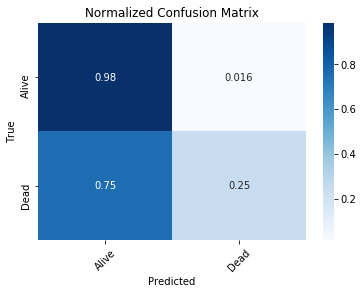

In [65]:
from plots import plot_confusion_matrix
results = [(i[0], i[1]) for i in zip(Y_test, logit_preds)]
class_names = ['Alive', 'Dead']
plot_confusion_matrix(results, class_names)

In [69]:
logit_probs = logit.predict_proba(X_test)
metrics.roc_auc_score(Y_test, logit_probs[:, 1])

0.8507503136185571

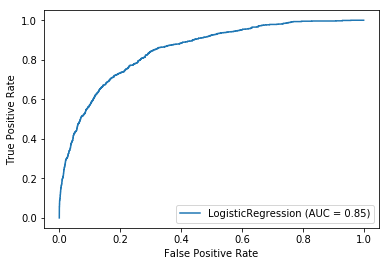

In [70]:
# auc curve
from sklearn import metrics
metrics.plot_roc_curve(logit, X_test, Y_test)  
plt.show()

## SVC model

In [72]:
# use C=1 to build the SVM model
svc = SVC(C=1, gamma="scale", probability = True)
svc.fit(X_train, Y_train)
svc_preds = svc.predict(X_test)
svc_accu = accuracy_score(Y_test, svc_preds)
svc_matrix = confusion_matrix(Y_test, svc_preds)

In [73]:
svc_accu

0.90828466363833

In [74]:
svc_matrix

array([[8128,   80],
       [ 768,  270]])

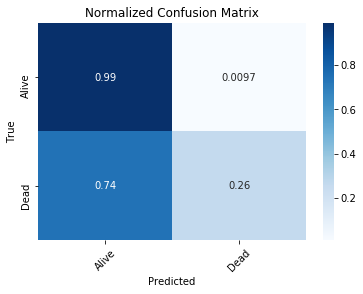

In [75]:
from plots import plot_confusion_matrix
results_svc = [(i[0], i[1]) for i in zip(Y_test, svc_preds)]
class_names = ['Alive', 'Dead']
plot_confusion_matrix(results_svc, class_names)

In [76]:
svc_probs = svc.predict_proba(X_test)
metrics.roc_auc_score(Y_test, svc_probs[:, 1])

0.8231762353190835

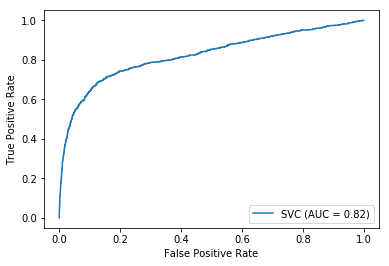

In [77]:
metrics.plot_roc_curve(svc, X_test, Y_test)  
plt.show()